# Python for investing

## import data via Yahoo finance

In [2]:
from pandas_datareader import data as pdr
import pandas as pd
import yfinance as yf
yf.pdr_override()

### example

In [3]:
EURUSD = pdr.get_data_yahoo("EURUSD=x", start = '2019-01-01', end= '2021-07-01')

[*********************100%***********************]  1 of 1 completed


In [4]:
EURUSD

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-12-31,1.143890,1.146592,1.142231,1.143995,1.143995,0
2019-01-01,1.149425,1.155001,1.146500,1.149306,1.149306,0
2019-01-02,1.146132,1.149700,1.134572,1.146171,1.146171,0
2019-01-03,1.131734,1.140914,1.131734,1.131811,1.131811,0
2019-01-04,1.139095,1.141774,1.134816,1.139108,1.139108,0
...,...,...,...,...,...,...
2021-06-24,1.193161,1.195672,1.191995,1.193317,1.193317,0
2021-06-25,1.192791,1.197447,1.192791,1.193033,1.193033,0
2021-06-28,1.194215,1.194600,1.190462,1.194215,1.194215,0


### change from daily data to weekly data (on MONDAY)

In [6]:
EURUSD.asfreq('W-MON')

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-12-31,1.143890,1.146592,1.142231,1.143995,1.143995,0
2019-01-07,1.141292,1.147447,1.140524,1.141044,1.141044,0
2019-01-14,1.146276,1.148369,1.145161,1.146014,1.146014,0
2019-01-21,1.136544,1.138822,1.135796,1.136557,1.136557,0
2019-01-28,1.141266,1.144558,1.139095,1.141305,1.141305,0
...,...,...,...,...,...,...
2021-05-31,1.219007,1.223391,1.218413,1.219007,1.219007,0
2021-06-07,1.216575,1.220200,1.214506,1.216841,1.216841,0
2021-06-14,1.211079,1.213151,1.209526,1.211020,1.211020,0


#### weekly return

In [8]:
EURUSD.asfreq('W-MON').pct_change()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-12-31,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-07,-0.002271,0.000746,-0.001494,-0.002579,-0.002579,NaN
2019-01-14,0.004367,0.000804,0.004065,0.004355,0.004355,NaN
2019-01-21,-0.008490,-0.008313,-0.008178,-0.008251,-0.008251,NaN
2019-01-28,0.004154,0.005036,0.002905,0.004177,0.004177,NaN
...,...,...,...,...,...,...
2021-05-31,0.000731,0.000367,0.000682,0.000561,0.000561,NaN
2021-06-07,-0.001995,-0.002609,-0.003206,-0.001777,-0.001777,NaN
2021-06-14,-0.004517,-0.005777,-0.004100,-0.004783,-0.004783,NaN


<AxesSubplot:xlabel='Date'>

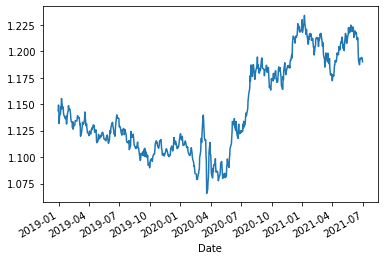

In [13]:
EURUSD.Close.plot()

<AxesSubplot:xlabel='Date'>

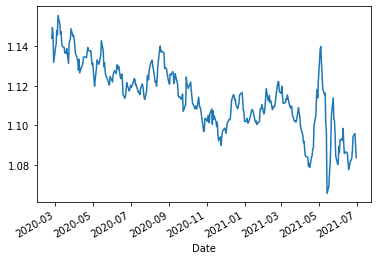

In [12]:

# move 300 line
EURUSD.Close.shift(300).plot()

#### daily return

<AxesSubplot:xlabel='Date'>

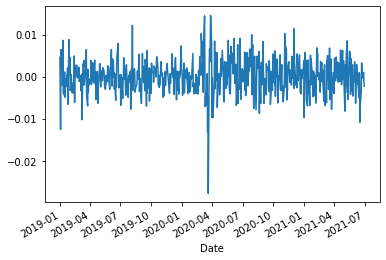

In [17]:
EURUSD.Close.pct_change().plot()

<AxesSubplot:xlabel='Date'>

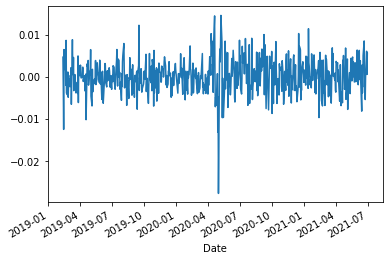

In [21]:
# you want to have smoother line

EURUSD.Close.shift(30).pct_change().plot()

## import multiple data

In [22]:
start = '2017-01-01'
end = '2017-04-30'
data = pdr.get_data_yahoo('MSFT AAPL', start = start, end = end)

[*********************100%***********************]  2 of 2 completed


In [26]:
data.head()

Adj Close                 Close                  High             \
                 AAPL       MSFT       AAPL       MSFT       AAPL       MSFT   
Date                                                                           
2017-01-03  27.219833  57.807823  29.037500  62.580002  29.082500  62.840000   
2017-01-04  27.189369  57.549175  29.004999  62.299999  29.127501  62.750000   
2017-01-05  27.327637  57.549175  29.152500  62.299999  29.215000  62.660000   
2017-01-06  27.632292  58.048000  29.477501  62.840000  29.540001  63.150002   
2017-01-09  27.885384  57.863247  29.747499  62.639999  29.857500  63.080002   

                  Low                  Open                Volume            
                 AAPL       MSFT       AAPL       MSFT       AAPL      MSFT  
Date                                                                         
2017-01-03  28.690001  62.130001  28.950001  62.790001  115127600  20694100  
2017-01-04  28.937500  62.119999  28.962500  62.480000   84472400  21340000  
2017-01-05  28.952499  62.029999  28.980000  62.189999   88774400  24876000  
2017-01-06  29.117500  62.040001  29.195000  62.299999  127007600  19922900  
2017-01-09  29.485001  62.540001  29.487499  62.759998  134247600  20382700

In [25]:
data.stack(level=0)

AAPL          MSFT
Date                                            
2017-01-03 Adj Close  2.721983e+01  5.780782e+01
           Close      2.903750e+01  6.258000e+01
           High       2.908250e+01  6.284000e+01
           Low        2.869000e+01  6.213000e+01
           Open       2.895000e+01  6.279000e+01
...                            ...           ...
2017-04-28 Close      3.591250e+01  6.846000e+01
           High       3.607500e+01  6.914000e+01
           Low        3.581750e+01  6.769000e+01
           Open       3.602250e+01  6.891000e+01
           Volume     8.344160e+07  3.954880e+07

[486 rows x 2 columns]

In [27]:
data.stack(level=1)

Adj Close      Close       High        Low       Open  \
Date                                                                     
2017-01-03 AAPL  27.219833  29.037500  29.082500  28.690001  28.950001   
           MSFT  57.807823  62.580002  62.840000  62.130001  62.790001   
2017-01-04 AAPL  27.189369  29.004999  29.127501  28.937500  28.962500   
           MSFT  57.549175  62.299999  62.750000  62.119999  62.480000   
2017-01-05 AAPL  27.327637  29.152500  29.215000  28.952499  28.980000   
...                    ...        ...        ...        ...        ...   
2017-04-26 MSFT  63.037354  67.830002  68.309998  67.620003  68.080002   
2017-04-27 AAPL  33.843384  35.947498  36.040001  35.827499  35.980000   
           MSFT  63.446251  68.269997  68.379997  67.580002  68.150002   
2017-04-28 AAPL  33.810436  35.912498  36.075001  35.817501  36.022499   
           MSFT  63.622829  68.459999  69.139999  67.690002  68.910004   

                    Volume  
Date                        
2017-01-03 AAPL  115127600  
           MSFT   20694100  
2017-01-04 AAPL   84472400  
           MSFT   21340000  
2017-01-05 AAPL   88774400  
...                    ...  
2017-04-26 MSFT   26190800  
2017-04-27 AAPL   56985200  
           MSFT   34971000  
2017-04-28 AAPL   83441600  
           MSFT   39548800  

[162 rows x 6 columns]

In [28]:
data_stack_lev1 = data.stack(level = 1)

In [36]:
data_stack_lev1.reset_index().set_index('Date')

,level_1,Adj Close,Close,High,Low,Open,Volume
Date,,,,,,,
2017-01-03,AAPL,27.219833,29.037500,29.082500,28.690001,28.950001,115127600
2017-01-03,MSFT,57.807823,62.580002,62.840000,62.130001,62.790001,20694100
2017-01-04,AAPL,27.189369,29.004999,29.127501,28.937500,28.962500,84472400
2017-01-04,MSFT,57.549175,62.299999,62.750000,62.119999,62.480000,21340000
2017-01-05,AAPL,27.327637,29.152500,29.215000,28.952499,28.980000,88774400
...,...,...,...,...,...,...,...
2017-04-26,MSFT,63.037354,67.830002,68.309998,67.620003,68.080002,26190800
2017-04-27,AAPL,33.843384,35.947498,36.040001,35.827499,35.980000,56985200
2017-04-27,MSFT,63.446251,68.269997,68.379997,67.580002,68.150002,34971000


In [41]:
data_stack = data_stack_lev1.reset_index().set_index('Date').rename(columns={'level_1':'stock'})

## Candlestick plot with mplfinance